In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
blacksmithinging_df=pd.read_csv('blacksmithing.csv')

In [3]:
blacksmithinging_df=blacksmithinging_df.set_index('datetime')

In [4]:
grouped_blacksmithing_df=blacksmithinging_df.groupby(['datetime','item.id']).min()

In [5]:
grouped_blacksmithing_df.head(10)

id  quantity  unit_price time_left  \
datetime            item.id                                               
2023-12-22 18:41:00 190314   1876655278         1      121.48      LONG   
                    190320   1876672851         1        6.52      LONG   
                    190321   1876672225         1       64.75      LONG   
                    190394   1876668414         1        1.19      LONG   
                    191873   1879385290         1     2000.00      LONG   
                    201400   1876667825         1        2.00      LONG   
2023-12-22 19:41:00 190314   1876764989         1      122.00      LONG   
                    190320   1876824961         1        5.00      LONG   
                    190321   1876836217         1       64.84      LONG   
                    190394   1877548179         1        1.09      LONG   

                                   item.name   item.class  
datetime            item.id                                
2023-12-22 18:41:00 190314   Khaz'gorite Ore  Trade Goods  
                    190320      Rousing Fire  Trade Goods  
                    190321     Awakened Fire  Trade Goods  
                    190394      Serevite Ore  Trade Goods  
                    191873      Armor Spikes  Trade Goods  
                    201400       Aquatic Maw  Trade Goods  
2023-12-22 19:41:00 190314   Khaz'gorite Ore  Trade Goods  
                    190320      Rousing Fire  Trade Goods  
                    190321     Awakened Fire  Trade Goods  
                    190394      Serevite Ore  Trade Goods

In [6]:
reset_bs_df=grouped_blacksmithing_df.reset_index()
reset_bs_df

datetime  item.id          id  quantity  unit_price  \
0     2023-12-22 18:41:00   190314  1876655278         1      121.48   
1     2023-12-22 18:41:00   190320  1876672851         1        6.52   
2     2023-12-22 18:41:00   190321  1876672225         1       64.75   
3     2023-12-22 18:41:00   190394  1876668414         1        1.19   
4     2023-12-22 18:41:00   191873  1879385290         1     2000.00   
...                   ...      ...         ...       ...         ...   
1703  2024-01-03 15:41:00   190320  1924827105         1        7.00   
1704  2024-01-03 15:41:00   190321  1925144537         1       72.21   
1705  2024-01-03 15:41:00   190394  1925037095         1        1.43   
1706  2024-01-03 15:41:00   191873  1926565237         1     2989.00   
1707  2024-01-03 15:41:00   201400  1924899986         1        2.25   

     time_left        item.name   item.class  
0         LONG  Khaz'gorite Ore  Trade Goods  
1         LONG     Rousing Fire  Trade Goods  
2         LONG    Awakened Fire  Trade Goods  
3         LONG     Serevite Ore  Trade Goods  
4         LONG     Armor Spikes  Trade Goods  
...        ...              ...          ...  
1703      LONG     Rousing Fire  Trade Goods  
1704      LONG    Awakened Fire  Trade Goods  
1705      LONG     Serevite Ore  Trade Goods  
1706      LONG     Armor Spikes  Trade Goods  
1707      LONG      Aquatic Maw  Trade Goods  

[1708 rows x 8 columns]

In [7]:
reset_bs_df=reset_bs_df.set_index('datetime')

In [8]:
armor_spikes_list=reset_bs_df['unit_price'].loc[reset_bs_df['item.id']==191873]
armor_spikes_material_price=(reset_bs_df['unit_price'].loc[reset_bs_df['item.id']==190321]*3+
                                     reset_bs_df['unit_price'].loc[reset_bs_df['item.id']==201400]*2+
                                     reset_bs_df['unit_price'].loc[reset_bs_df['item.id']==190314]*15+
                                     reset_bs_df['unit_price'].loc[reset_bs_df['item.id']==190394]*30)
armor_spikes_df=pd.DataFrame(armor_spikes_list)
armor_spikes_df['material_price']=armor_spikes_material_price
armor_spikes_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      2000.0         2056.15
2023-12-22 19:41:00      2000.0         2061.52
2023-12-22 20:41:00      2000.0         4030.10
2023-12-22 21:41:00      2000.0         3987.05
2023-12-22 22:41:00      2000.0         3677.69
...                         ...             ...
2024-01-03 11:41:00      2989.0         2639.39
2024-01-03 12:41:00      2989.0         2623.25
2024-01-03 13:41:00      2989.0         2288.61
2024-01-03 14:41:00      2989.0         2314.93
2024-01-03 15:41:00      2989.0         2226.18

[283 rows x 2 columns]

In [9]:
armor_spikes_df['potential_profit']=(armor_spikes_df['unit_price']-armor_spikes_df['material_price'])
armor_spikes_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      2000.0         2056.15            -56.15
2023-12-22 19:41:00      2000.0         2061.52            -61.52
2023-12-22 20:41:00      2000.0         4030.10          -2030.10
2023-12-22 21:41:00      2000.0         3987.05          -1987.05
2023-12-22 22:41:00      2000.0         3677.69          -1677.69
...                         ...             ...               ...
2024-01-03 11:41:00      2989.0         2639.39            349.61
2024-01-03 12:41:00      2989.0         2623.25            365.75
2024-01-03 13:41:00      2989.0         2288.61            700.39
2024-01-03 14:41:00      2989.0         2314.93            674.07
2024-01-03 15:41:00      2989.0         2226.18            762.82

[283 rows x 3 columns]

<Axes: xlabel='datetime'>

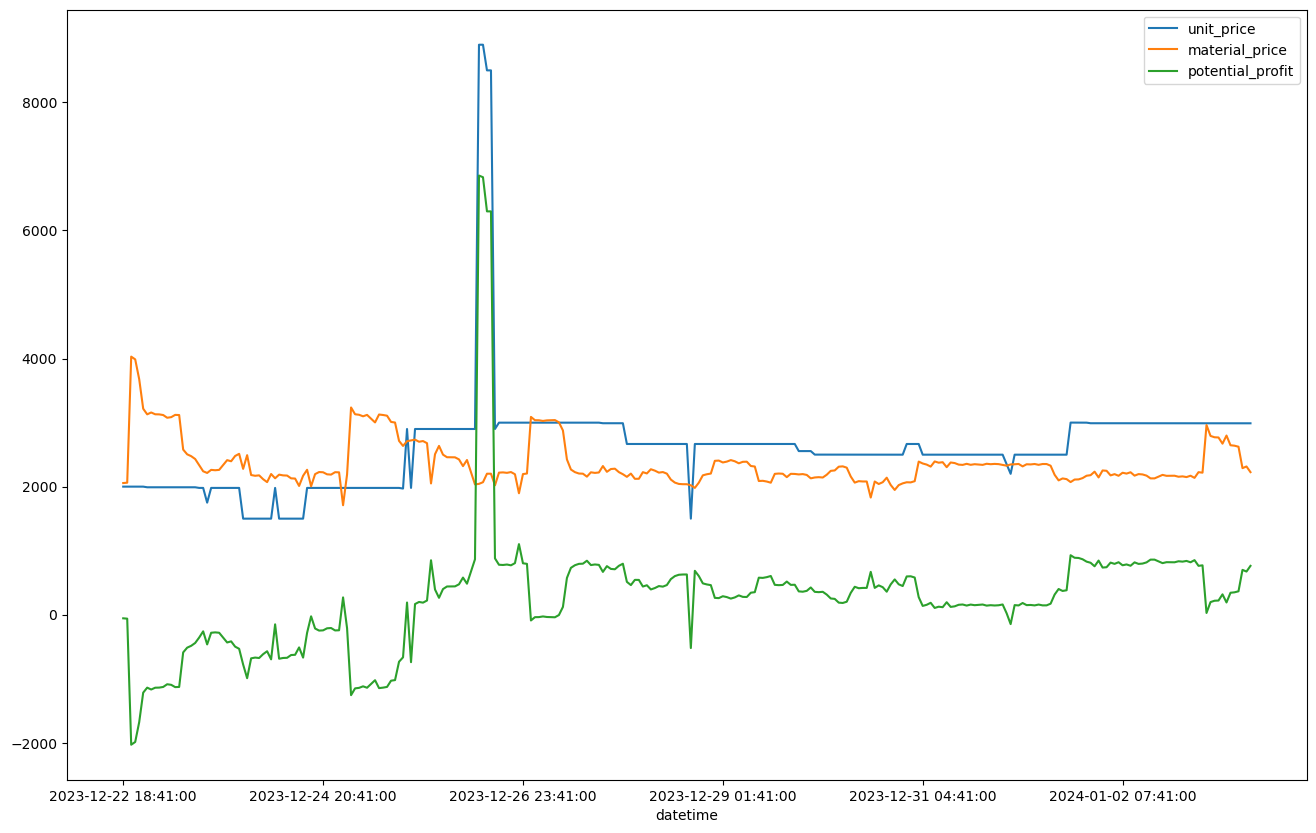

In [12]:
armor_spikes_df.plot(figsize=(16,10))

In [13]:
armor_spikes_df['potential_profit'].mean()

248.32438162544165

In [14]:
armor_spikes_df.to_csv('C:/Users/gc20r/Desktop/python_challenges/Action_House/Auction_House/armor_spikes.csv')